In [377]:
#importing libraries

In [395]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [ ]:
#importing dataset

In [ ]:
df=pd.read_csv('covid.csv')
df.head()

In [ ]:
#applying eda

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
sns.set_context('paper', font_scale=2.0)

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
df.isnull().values.any()

In [ ]:
df['Deaths'].unique()

In [ ]:
df['Recovered'].unique()

In [ ]:
df.isnull().sum()

In [ ]:
df['Lat'].fillna(df['Lat'].mean(),inplace=True)
df['Long_'].fillna(df['Long_'].mean(),inplace=True)
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(),inplace=True)
df['People_Tested'].fillna(df['People_Tested'].mean(),inplace=True)
df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(),inplace=True)
df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['city']=le.fit_transform(df['city'])

list1=['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed','Active', 'FIPS','Incident_Rate',
       'People_Tested','People_Hospitalized','Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate']
for val in list1:
   df[val]=le.fit_transform(df[val].astype(str))

In [ ]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [ ]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [ ]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('Recovered',axis=1).corrwith(df['Recovered']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [ ]:
for col in df1.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [ ]:
df.columns

In [ ]:
#checking skewness

In [ ]:
df.skew()

In [ ]:
df.head()


In [ ]:
df.dtypes

In [ ]:
# UNIVARIATE AND BIVARIATE ANALYSIS

In [ ]:
sns.countplot(x='Province_State',data=df)

In [ ]:
sns.countplot(x='People_Tested',data=df)

In [ ]:
sns.countplot(x='Last_Update',data=df)

In [ ]:
sns.countplot(x='Deaths',data=df)

In [ ]:
sns.countplot(x='Recovered',data=df)

In [ ]:
sns.countplot(x='Hospitalization_Rate',data=df)

In [ ]:
sns.countplot(x='Testing_Rate',data=df)

In [ ]:
sns.countplot(x='Confirmed',data=df)

In [ ]:
sns.countplot(x='Active',data=df)

In [ ]:
df.hist(figsize=(15,15))

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Active',y='Recovered',data=df,kind='reg')

In [ ]:
df.columns

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Active',y='Deaths',data=df,kind='reg')

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Active',y='People_Tested',data=df,kind='reg')

In [ ]:
df['Recovered'].values.max()

In [ ]:
plt.figure(figsize=(20,4))
sns.barplot(x='People_Tested',y='Active', data=df)
sns.set_context('paper', font_scale=0.5)

In [ ]:
plt.figure(figsize=(20,3))
sns.barplot(x='People_Tested',y='Active', data=df)
sns.set_context('paper', font_scale=2)

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Deaths',y='Active', data=df)
sns.set_context('paper', font_scale=1.6)

In [ ]:
plt.figure(figsize=(29,3))
sns.countplot(x='Deaths',data=df)
sns.set_context('paper', font_scale=1.9)

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
df=df.corr()
df

In [ ]:
df.columns

In [ ]:
#splitting the trining set and test set

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X

In [ ]:
y

In [ ]:
# THINK WHICH MODEL CAN BE APPLIED OVER THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [ ]:
y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [379]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [380]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

0.1724137931034483

In [381]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Deaths,Recovered
ISO3,0.192452,NaN,NaN,0.343314,-0.037773,0.355352,0.214076,-0.216959,0.050984,-0.049685,0.101357,-0.071359,0.374093,1.000000,-0.032373,-0.189842,0.085588,0.106175
Testing_Rate,0.068532,NaN,NaN,-0.098403,-0.132708,-0.205225,-0.097558,-0.015505,0.072918,-0.040298,0.007954,0.229537,0.015691,-0.032373,1.000000,-0.056093,0.212402,0.104774
Hospitalization_Rate,-0.071057,NaN,NaN,0.169395,0.118996,-0.259612,0.028618,0.031038,0.148028,0.100358,-0.350405,-0.101304,-0.079433,-0.189842,-0.056093,1.000000,-0.086125,0.022691
Deaths,-0.015556,NaN,NaN,0.096233,-0.130100,-0.093875,-0.010344,-0.105129,-0.214025,-0.105525,0.091104,0.270321,-0.049555,0.085588,0.212402,-0.086125,1.000000,0.782292
Recovered,0.056895,NaN,NaN,0.179302,0.012493,-0.113585,-0.113534,-0.184350,-0.235401,-0.145680,0.040377,0.155982,0.008645,0.106175,0.104774,0.022691,0.782292,1.000000


In [382]:
y_test

array([  473,   528,     0,  1275,  6264, 28234,   578,     0,  2826,
           0, 23945,  7681,  1059,    61,   824,    13,   352, 11637,
        4423,   950,  1100,     0,     0,  3773,     0,  1302,  4266,
       12227,  1030], dtype=int64)

In [383]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
pred=regressor.predict(X_test)

In [384]:
from sklearn import metrics

In [385]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3818.7241379310344
MSE: 52433129.06896552
RMSE: 7241.072370095849


In [386]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)

In [387]:
# FIND THE INPUT FEATURES AND TARGET VARIABLES

In [388]:
from sklearn import metrics

In [389]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5779.855108178945
MSE: 51514365.45256276
RMSE: 7177.350865922799


In [390]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [391]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6763.704827586206
MSE: 73437924.1143931
RMSE: 8569.592995842515


Text(0, 0.5, 'Predicted Y')

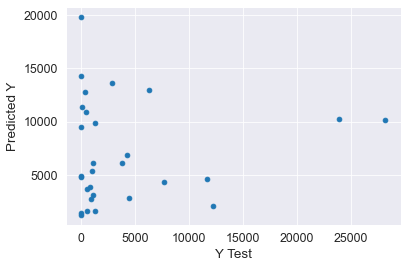

In [392]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [394]:
#saving this model 
import joblib

#saving the model as a pickle in a file
joblib.dump(rdr,'space.plk')

['space.plk']